# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
                                                    data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

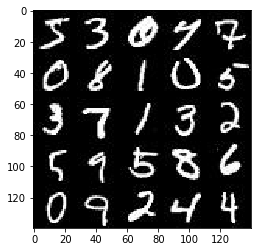

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

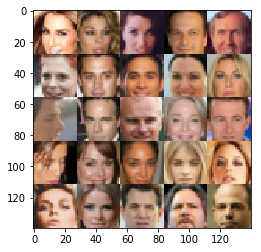

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.1.0


/Users/adi/anaconda/envs/facegen/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    real_input = tf.placeholder(tf.float32, (None, image_height, image_width, image_channels))
    z_data = tf.placeholder(tf.float32, (None, z_dim))
    learning_rate = tf.placeholder(tf.float32)
    return real_input, z_data, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
discOutHeight = 7
discOutWidth = 7
discOutDepth = 256
discOutSize = discOutHeight*discOutWidth*discOutDepth

# images size 28x28x3
# transformation to 28x28x64
filter_1 = 64
kernel_size_1 = 5
stride_1 = 1

# transformation to 14x14x128
filter_2 = 128
kernel_size_2 = 5
stride_2 = 2

# transformation to 7x7x256
filter_3 = 256
kernel_size_3 = 5
stride_3 = 2



In [7]:
def discriminator(images, reuse=False, alpha = 0.1):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function
    
    
    #stddev=0.02
    #kernel_initializer = tf.random_normal_initializer(stddev=stddev)
    kernel_initializer = tf.contrib.layers.xavier_initializer()
    
    keep_prob = 0.7
    
    with tf.variable_scope('discriminator', reuse=reuse):
        x1 = tf.layers.conv2d(images, filter_1, kernel_size_1, strides=stride_1, padding='same',
                              kernel_initializer=kernel_initializer)
        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.nn.dropout(x1, keep_prob)
        
        x1 = tf.layers.conv2d(x1, filter_2, kernel_size_2, strides=stride_2, padding='same',
                              kernel_initializer=kernel_initializer)
        x1 = tf.layers.batch_normalization(x1, training=True)
        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.nn.dropout(x1, keep_prob)
        
        x1 = tf.layers.conv2d(x1, filter_3, kernel_size_3, strides=stride_3, padding='same',
                              kernel_initializer=kernel_initializer)
        x1 = tf.layers.batch_normalization(x1, training=True)
        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.nn.dropout(x1, keep_prob)
        
        # Flatten it
        #flat = tf.reshape(x1, (-1, discOutSize))
        flat = tf.contrib.layers.flatten(x1, (-1, discOutSize))
        
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [8]:
def generator(z, out_channel_dim, is_train=True, alpha = 0.1):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    keep_prob = 0.5
    
    with tf.variable_scope('generator', reuse=not is_train):
        # First fully connected layer
        x1 = tf.layers.dense(z, discOutHeight*discOutWidth*512)
        # Reshape it to start the convolutional stack
        x1 = tf.reshape(x1, (-1, discOutHeight, discOutWidth, 512))
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.nn.dropout(x1, keep_prob)
        # 7x7x512
        
        x1 = tf.layers.conv2d_transpose(x1, 256, 5, strides=2, padding='same')
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.nn.dropout(x1, keep_prob)
        # 14x14x256
        
        x1 = tf.layers.conv2d_transpose(x1, 64, 5, strides=2, padding='same')
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.nn.dropout(x1, keep_prob)
        # 28x28x64
        
        x1 = tf.layers.conv2d_transpose(x1, 32, 5, strides=1, padding='same')
        x1 = tf.layers.batch_normalization(x1, training=is_train)
        x1 = tf.maximum(alpha * x1, x1)
        x1 = tf.nn.dropout(x1, keep_prob)
        # 28x28x32
        
        # Output layer
        logits = tf.layers.conv2d_transpose(x1, out_channel_dim, 5, strides=1, padding='same')
        # 28x28x5
        
        out = tf.tanh(logits)
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [9]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)

    smooth = 0.9
    
    d_loss_real = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, labels=tf.ones_like(d_model_real)*smooth))
    d_loss_fake = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.zeros_like(d_model_fake)))
    g_loss = tf.reduce_mean(
        tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, labels=tf.ones_like(d_model_fake)))

    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [10]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)):
        d_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
        g_train_opt = tf.train.AdamOptimizer(learning_rate, beta1=beta1).minimize(g_loss, var_list=g_vars)

    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [11]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [12]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    n_samples, width, height, channels = data_shape
    input_real, input_z, learn_rate = model_inputs(width, height, channels, z_dim)
    d_loss, g_loss = model_loss(input_real, input_z, channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learn_rate, beta1)
    
    steps = 0
    print_every = 10
    show_every = 200
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                
                batch_images*=2

                # Sample random noise for G
                batch_z = np.random.uniform(-1, 1, size=(batch_size, z_dim))

                # Run optimizers
                _ = sess.run(d_opt, feed_dict={input_real: batch_images, input_z: batch_z, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, learn_rate: learning_rate})
                _ = sess.run(g_opt, feed_dict={input_z: batch_z, input_real: batch_images, learn_rate: learning_rate})
                
                if steps % show_every == 0:
                    n_images = 16
                    show_generator_output(sess, n_images, input_z, channels, data_image_mode)
                    
                if steps % print_every == 0:
                    # At the end of each epoch, get the losses and print them out
                    train_loss_d = d_loss.eval({input_z: batch_z, input_real: batch_images})
                    train_loss_g = g_loss.eval({input_z: batch_z})

                    print("Epoch {}/{}...".format(epoch_i, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 0/2... Discriminator Loss: 1.3350... Generator Loss: 1.3401
Epoch 0/2... Discriminator Loss: 0.8965... Generator Loss: 1.8234
Epoch 0/2... Discriminator Loss: 1.2458... Generator Loss: 2.0182
Epoch 0/2... Discriminator Loss: 1.5346... Generator Loss: 1.2914
Epoch 0/2... Discriminator Loss: 1.4775... Generator Loss: 0.9451
Epoch 0/2... Discriminator Loss: 1.5295... Generator Loss: 0.7865
Epoch 0/2... Discriminator Loss: 1.6166... Generator Loss: 1.1824
Epoch 0/2... Discriminator Loss: 1.4846... Generator Loss: 0.9569
Epoch 0/2... Discriminator Loss: 1.8160... Generator Loss: 0.4816
Epoch 0/2... Discriminator Loss: 1.3054... Generator Loss: 1.4528
Epoch 0/2... Discriminator Loss: 1.6041... Generator Loss: 0.5674
Epoch 0/2... Discriminator Loss: 1.3946... Generator Loss: 0.8187
Epoch 0/2... Discriminator Loss: 1.2154... Generator Loss: 1.1059
Epoch 0/2... Discriminator Loss: 1.1703... Generator Loss: 1.8258
Epoch 0/2... Discriminator Loss: 1.2799... Generator Loss: 1.0210
Epoch 0/2.

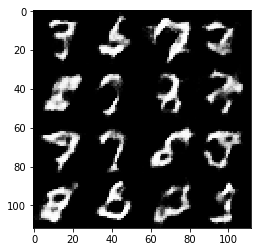

Epoch 0/2... Discriminator Loss: 1.3046... Generator Loss: 1.3600
Epoch 0/2... Discriminator Loss: 1.3567... Generator Loss: 0.9805
Epoch 0/2... Discriminator Loss: 1.4648... Generator Loss: 0.7680
Epoch 0/2... Discriminator Loss: 1.4018... Generator Loss: 0.7270
Epoch 0/2... Discriminator Loss: 1.6453... Generator Loss: 0.5795
Epoch 0/2... Discriminator Loss: 1.2936... Generator Loss: 1.0121
Epoch 0/2... Discriminator Loss: 1.2625... Generator Loss: 1.5952
Epoch 0/2... Discriminator Loss: 1.2717... Generator Loss: 1.2345
Epoch 0/2... Discriminator Loss: 1.4622... Generator Loss: 1.3301
Epoch 0/2... Discriminator Loss: 1.5042... Generator Loss: 0.6724
Epoch 0/2... Discriminator Loss: 1.3468... Generator Loss: 0.7204
Epoch 0/2... Discriminator Loss: 1.3589... Generator Loss: 1.1953
Epoch 0/2... Discriminator Loss: 1.3309... Generator Loss: 0.8953
Epoch 0/2... Discriminator Loss: 1.3052... Generator Loss: 0.6103
Epoch 0/2... Discriminator Loss: 1.5392... Generator Loss: 0.5424
Epoch 0/2.

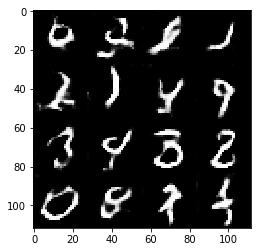

Epoch 0/2... Discriminator Loss: 1.3078... Generator Loss: 0.7731
Epoch 0/2... Discriminator Loss: 1.3402... Generator Loss: 1.0527
Epoch 0/2... Discriminator Loss: 1.3194... Generator Loss: 1.0607
Epoch 0/2... Discriminator Loss: 1.4138... Generator Loss: 1.3569
Epoch 0/2... Discriminator Loss: 1.3294... Generator Loss: 1.2688
Epoch 0/2... Discriminator Loss: 1.1056... Generator Loss: 1.1714
Epoch 0/2... Discriminator Loss: 1.3426... Generator Loss: 0.6063
Epoch 0/2... Discriminator Loss: 1.2022... Generator Loss: 0.7846
Epoch 0/2... Discriminator Loss: 1.2181... Generator Loss: 0.8003
Epoch 0/2... Discriminator Loss: 1.2280... Generator Loss: 1.0235
Epoch 0/2... Discriminator Loss: 1.2497... Generator Loss: 0.8543
Epoch 0/2... Discriminator Loss: 1.4480... Generator Loss: 0.6168
Epoch 0/2... Discriminator Loss: 1.2291... Generator Loss: 1.3190
Epoch 0/2... Discriminator Loss: 1.2080... Generator Loss: 1.2697
Epoch 0/2... Discriminator Loss: 1.0765... Generator Loss: 1.1157
Epoch 0/2.

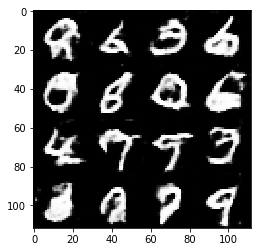

Epoch 0/2... Discriminator Loss: 1.2961... Generator Loss: 0.8395
Epoch 0/2... Discriminator Loss: 1.2541... Generator Loss: 0.9687
Epoch 0/2... Discriminator Loss: 1.2249... Generator Loss: 0.7716
Epoch 0/2... Discriminator Loss: 1.2793... Generator Loss: 0.6854
Epoch 0/2... Discriminator Loss: 1.1445... Generator Loss: 0.8791
Epoch 0/2... Discriminator Loss: 1.2543... Generator Loss: 0.8349
Epoch 0/2... Discriminator Loss: 1.2726... Generator Loss: 0.8554
Epoch 0/2... Discriminator Loss: 1.3429... Generator Loss: 0.6326
Epoch 0/2... Discriminator Loss: 1.7019... Generator Loss: 2.0520
Epoch 0/2... Discriminator Loss: 1.2374... Generator Loss: 0.9749
Epoch 0/2... Discriminator Loss: 1.2430... Generator Loss: 1.1422
Epoch 0/2... Discriminator Loss: 1.1929... Generator Loss: 1.1239
Epoch 0/2... Discriminator Loss: 1.3021... Generator Loss: 0.9015
Epoch 0/2... Discriminator Loss: 1.1206... Generator Loss: 1.0372
Epoch 0/2... Discriminator Loss: 1.3973... Generator Loss: 1.7297
Epoch 0/2.

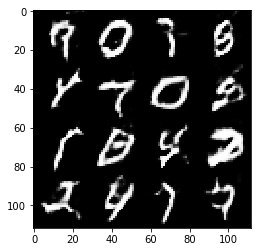

Epoch 0/2... Discriminator Loss: 1.2796... Generator Loss: 1.7832
Epoch 0/2... Discriminator Loss: 1.0853... Generator Loss: 1.2604
Epoch 0/2... Discriminator Loss: 1.2983... Generator Loss: 1.7529
Epoch 0/2... Discriminator Loss: 1.1741... Generator Loss: 1.4106
Epoch 0/2... Discriminator Loss: 1.0215... Generator Loss: 1.7280
Epoch 0/2... Discriminator Loss: 1.0993... Generator Loss: 1.3051
Epoch 0/2... Discriminator Loss: 1.6979... Generator Loss: 0.5445
Epoch 0/2... Discriminator Loss: 1.4423... Generator Loss: 0.9880
Epoch 0/2... Discriminator Loss: 1.2936... Generator Loss: 1.0146
Epoch 0/2... Discriminator Loss: 1.0759... Generator Loss: 1.3234
Epoch 0/2... Discriminator Loss: 1.2174... Generator Loss: 0.9254
Epoch 0/2... Discriminator Loss: 1.4005... Generator Loss: 0.6793
Epoch 0/2... Discriminator Loss: 1.1214... Generator Loss: 1.0470
Epoch 0/2... Discriminator Loss: 1.3148... Generator Loss: 1.1656
Epoch 1/2... Discriminator Loss: 1.4933... Generator Loss: 0.5318
Epoch 1/2.

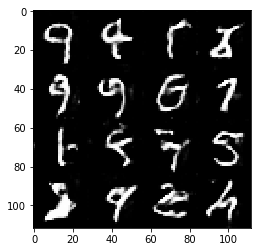

Epoch 1/2... Discriminator Loss: 1.1841... Generator Loss: 1.0466
Epoch 1/2... Discriminator Loss: 1.1958... Generator Loss: 0.7963
Epoch 1/2... Discriminator Loss: 1.0107... Generator Loss: 1.2550
Epoch 1/2... Discriminator Loss: 1.0720... Generator Loss: 1.0711
Epoch 1/2... Discriminator Loss: 1.1562... Generator Loss: 0.9573
Epoch 1/2... Discriminator Loss: 1.2002... Generator Loss: 1.1160
Epoch 1/2... Discriminator Loss: 1.2862... Generator Loss: 0.7544
Epoch 1/2... Discriminator Loss: 1.1134... Generator Loss: 1.1677
Epoch 1/2... Discriminator Loss: 1.1960... Generator Loss: 0.7623
Epoch 1/2... Discriminator Loss: 1.1587... Generator Loss: 1.0622
Epoch 1/2... Discriminator Loss: 1.4685... Generator Loss: 0.5250
Epoch 1/2... Discriminator Loss: 1.0215... Generator Loss: 1.2274
Epoch 1/2... Discriminator Loss: 1.0599... Generator Loss: 1.1345
Epoch 1/2... Discriminator Loss: 1.3171... Generator Loss: 1.3664
Epoch 1/2... Discriminator Loss: 1.0925... Generator Loss: 1.1740
Epoch 1/2.

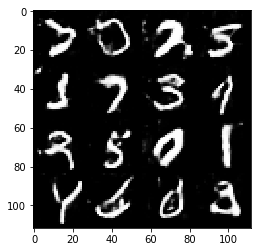

Epoch 1/2... Discriminator Loss: 1.2269... Generator Loss: 1.0207
Epoch 1/2... Discriminator Loss: 1.1081... Generator Loss: 1.0524
Epoch 1/2... Discriminator Loss: 1.5708... Generator Loss: 2.2421
Epoch 1/2... Discriminator Loss: 1.1119... Generator Loss: 1.0316
Epoch 1/2... Discriminator Loss: 1.3491... Generator Loss: 0.8221
Epoch 1/2... Discriminator Loss: 1.2596... Generator Loss: 1.2432
Epoch 1/2... Discriminator Loss: 1.0410... Generator Loss: 1.1507
Epoch 1/2... Discriminator Loss: 1.2246... Generator Loss: 0.7063
Epoch 1/2... Discriminator Loss: 1.5144... Generator Loss: 0.7248
Epoch 1/2... Discriminator Loss: 1.0472... Generator Loss: 1.1703
Epoch 1/2... Discriminator Loss: 1.6793... Generator Loss: 2.2450
Epoch 1/2... Discriminator Loss: 1.2798... Generator Loss: 0.8383
Epoch 1/2... Discriminator Loss: 1.3854... Generator Loss: 1.5092
Epoch 1/2... Discriminator Loss: 1.1553... Generator Loss: 1.2127
Epoch 1/2... Discriminator Loss: 1.2180... Generator Loss: 1.5112
Epoch 1/2.

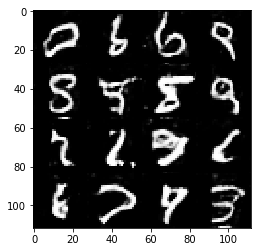

Epoch 1/2... Discriminator Loss: 1.3009... Generator Loss: 0.9113
Epoch 1/2... Discriminator Loss: 1.3245... Generator Loss: 0.7561
Epoch 1/2... Discriminator Loss: 1.2631... Generator Loss: 1.2646
Epoch 1/2... Discriminator Loss: 1.2425... Generator Loss: 1.0096
Epoch 1/2... Discriminator Loss: 1.1582... Generator Loss: 0.8341
Epoch 1/2... Discriminator Loss: 1.0748... Generator Loss: 1.2255
Epoch 1/2... Discriminator Loss: 1.1328... Generator Loss: 0.9826
Epoch 1/2... Discriminator Loss: 1.3281... Generator Loss: 0.9780
Epoch 1/2... Discriminator Loss: 1.2782... Generator Loss: 1.1994
Epoch 1/2... Discriminator Loss: 1.2316... Generator Loss: 0.8973
Epoch 1/2... Discriminator Loss: 1.1931... Generator Loss: 1.6825
Epoch 1/2... Discriminator Loss: 1.4101... Generator Loss: 0.6182
Epoch 1/2... Discriminator Loss: 1.4060... Generator Loss: 0.5779
Epoch 1/2... Discriminator Loss: 1.1546... Generator Loss: 1.0437
Epoch 1/2... Discriminator Loss: 0.9632... Generator Loss: 1.5038
Epoch 1/2.

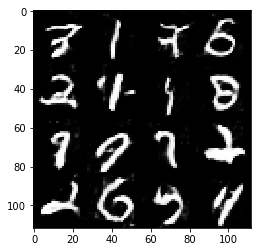

Epoch 1/2... Discriminator Loss: 1.1741... Generator Loss: 0.9475
Epoch 1/2... Discriminator Loss: 1.2180... Generator Loss: 1.0222
Epoch 1/2... Discriminator Loss: 1.2265... Generator Loss: 1.3143
Epoch 1/2... Discriminator Loss: 1.1352... Generator Loss: 1.3316
Epoch 1/2... Discriminator Loss: 1.2460... Generator Loss: 0.7626
Epoch 1/2... Discriminator Loss: 1.2666... Generator Loss: 0.8380
Epoch 1/2... Discriminator Loss: 1.2883... Generator Loss: 0.9233
Epoch 1/2... Discriminator Loss: 1.3185... Generator Loss: 1.0452
Epoch 1/2... Discriminator Loss: 1.1787... Generator Loss: 1.0156
Epoch 1/2... Discriminator Loss: 1.1706... Generator Loss: 0.9603
Epoch 1/2... Discriminator Loss: 1.2291... Generator Loss: 1.0745
Epoch 1/2... Discriminator Loss: 1.3461... Generator Loss: 0.8016
Epoch 1/2... Discriminator Loss: 1.1690... Generator Loss: 1.0572
Epoch 1/2... Discriminator Loss: 1.2943... Generator Loss: 0.7073
Epoch 1/2... Discriminator Loss: 1.3049... Generator Loss: 1.4709
Epoch 1/2.

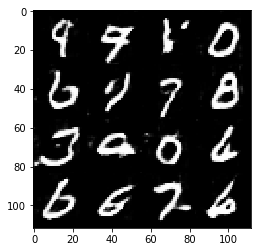

Epoch 1/2... Discriminator Loss: 1.1970... Generator Loss: 0.8735
Epoch 1/2... Discriminator Loss: 1.3011... Generator Loss: 1.1605
Epoch 1/2... Discriminator Loss: 1.1267... Generator Loss: 1.6622
Epoch 1/2... Discriminator Loss: 1.1759... Generator Loss: 1.1928
Epoch 1/2... Discriminator Loss: 1.2255... Generator Loss: 0.8294
Epoch 1/2... Discriminator Loss: 1.2953... Generator Loss: 1.3478
Epoch 1/2... Discriminator Loss: 1.0701... Generator Loss: 1.1270
Epoch 1/2... Discriminator Loss: 0.9653... Generator Loss: 1.3153


In [13]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 0/1... Discriminator Loss: 0.7545... Generator Loss: 2.7041
Epoch 0/1... Discriminator Loss: 1.4576... Generator Loss: 4.6858
Epoch 0/1... Discriminator Loss: 0.8758... Generator Loss: 1.9660
Epoch 0/1... Discriminator Loss: 0.8261... Generator Loss: 3.7081
Epoch 0/1... Discriminator Loss: 0.6610... Generator Loss: 3.4026
Epoch 0/1... Discriminator Loss: 0.8147... Generator Loss: 1.9413
Epoch 0/1... Discriminator Loss: 1.0037... Generator Loss: 1.4040
Epoch 0/1... Discriminator Loss: 2.1517... Generator Loss: 4.0593
Epoch 0/1... Discriminator Loss: 0.9214... Generator Loss: 2.3945
Epoch 0/1... Discriminator Loss: 1.1867... Generator Loss: 1.0948
Epoch 0/1... Discriminator Loss: 1.0878... Generator Loss: 1.6539
Epoch 0/1... Discriminator Loss: 1.9544... Generator Loss: 0.4692
Epoch 0/1... Discriminator Loss: 1.1305... Generator Loss: 1.3138
Epoch 0/1... Discriminator Loss: 1.4842... Generator Loss: 0.7433
Epoch 0/1... Discriminator Loss: 0.8389... Generator Loss: 1.4784
Epoch 0/1.

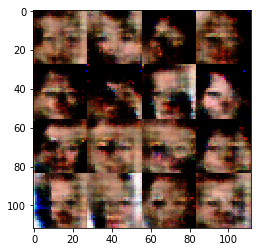

Epoch 0/1... Discriminator Loss: 1.1768... Generator Loss: 1.1821
Epoch 0/1... Discriminator Loss: 0.6969... Generator Loss: 1.8097
Epoch 0/1... Discriminator Loss: 1.3060... Generator Loss: 0.9368
Epoch 0/1... Discriminator Loss: 0.9598... Generator Loss: 1.3986
Epoch 0/1... Discriminator Loss: 1.1606... Generator Loss: 1.1470
Epoch 0/1... Discriminator Loss: 1.2143... Generator Loss: 0.7758
Epoch 0/1... Discriminator Loss: 1.3822... Generator Loss: 0.7790
Epoch 0/1... Discriminator Loss: 1.2161... Generator Loss: 1.2634
Epoch 0/1... Discriminator Loss: 0.8252... Generator Loss: 1.1106
Epoch 0/1... Discriminator Loss: 1.2545... Generator Loss: 3.2157
Epoch 0/1... Discriminator Loss: 1.0043... Generator Loss: 1.5835
Epoch 0/1... Discriminator Loss: 1.3481... Generator Loss: 0.8048
Epoch 0/1... Discriminator Loss: 1.0668... Generator Loss: 1.0487
Epoch 0/1... Discriminator Loss: 1.0578... Generator Loss: 1.1725
Epoch 0/1... Discriminator Loss: 0.8159... Generator Loss: 1.4736
Epoch 0/1.

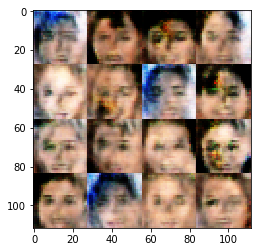

Epoch 0/1... Discriminator Loss: 1.4177... Generator Loss: 0.9025
Epoch 0/1... Discriminator Loss: 2.7059... Generator Loss: 3.8315
Epoch 0/1... Discriminator Loss: 1.2866... Generator Loss: 0.9228
Epoch 0/1... Discriminator Loss: 1.4022... Generator Loss: 1.1532
Epoch 0/1... Discriminator Loss: 1.3811... Generator Loss: 0.6076
Epoch 0/1... Discriminator Loss: 2.0343... Generator Loss: 3.6127
Epoch 0/1... Discriminator Loss: 0.7843... Generator Loss: 1.7419
Epoch 0/1... Discriminator Loss: 1.1605... Generator Loss: 1.0425
Epoch 0/1... Discriminator Loss: 1.3129... Generator Loss: 1.0860
Epoch 0/1... Discriminator Loss: 1.1320... Generator Loss: 1.4852
Epoch 0/1... Discriminator Loss: 1.1561... Generator Loss: 0.8618
Epoch 0/1... Discriminator Loss: 1.2198... Generator Loss: 1.7016
Epoch 0/1... Discriminator Loss: 1.0132... Generator Loss: 1.3682
Epoch 0/1... Discriminator Loss: 1.3704... Generator Loss: 1.2488
Epoch 0/1... Discriminator Loss: 1.3947... Generator Loss: 0.6148
Epoch 0/1.

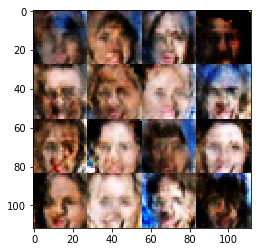

Epoch 0/1... Discriminator Loss: 1.1586... Generator Loss: 1.4097
Epoch 0/1... Discriminator Loss: 1.2445... Generator Loss: 1.0907
Epoch 0/1... Discriminator Loss: 1.5641... Generator Loss: 1.3828
Epoch 0/1... Discriminator Loss: 1.3737... Generator Loss: 0.6512
Epoch 0/1... Discriminator Loss: 1.2020... Generator Loss: 1.2635
Epoch 0/1... Discriminator Loss: 1.1463... Generator Loss: 1.2185
Epoch 0/1... Discriminator Loss: 1.5786... Generator Loss: 0.6496
Epoch 0/1... Discriminator Loss: 1.0813... Generator Loss: 1.2572
Epoch 0/1... Discriminator Loss: 1.5978... Generator Loss: 0.8386
Epoch 0/1... Discriminator Loss: 1.4362... Generator Loss: 0.5777
Epoch 0/1... Discriminator Loss: 1.1169... Generator Loss: 1.1827
Epoch 0/1... Discriminator Loss: 1.3989... Generator Loss: 1.2155
Epoch 0/1... Discriminator Loss: 1.2219... Generator Loss: 1.0459
Epoch 0/1... Discriminator Loss: 1.4846... Generator Loss: 0.7396
Epoch 0/1... Discriminator Loss: 1.3747... Generator Loss: 1.5838
Epoch 0/1.

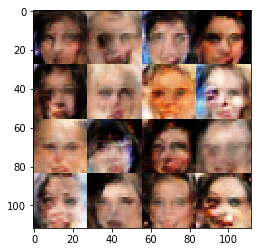

Epoch 0/1... Discriminator Loss: 1.4613... Generator Loss: 0.6356
Epoch 0/1... Discriminator Loss: 1.4141... Generator Loss: 0.9100
Epoch 0/1... Discriminator Loss: 1.3598... Generator Loss: 1.0112
Epoch 0/1... Discriminator Loss: 1.2708... Generator Loss: 0.9069
Epoch 0/1... Discriminator Loss: 1.2497... Generator Loss: 1.2118
Epoch 0/1... Discriminator Loss: 1.2577... Generator Loss: 1.1471
Epoch 0/1... Discriminator Loss: 1.4482... Generator Loss: 0.9579
Epoch 0/1... Discriminator Loss: 1.3021... Generator Loss: 0.8718
Epoch 0/1... Discriminator Loss: 1.6215... Generator Loss: 0.7606
Epoch 0/1... Discriminator Loss: 1.1005... Generator Loss: 0.9151
Epoch 0/1... Discriminator Loss: 1.3389... Generator Loss: 1.5329
Epoch 0/1... Discriminator Loss: 1.1378... Generator Loss: 0.9003
Epoch 0/1... Discriminator Loss: 1.6260... Generator Loss: 0.8882
Epoch 0/1... Discriminator Loss: 1.1854... Generator Loss: 1.0099
Epoch 0/1... Discriminator Loss: 1.3409... Generator Loss: 0.8021
Epoch 0/1.

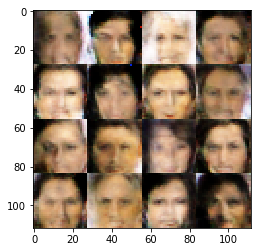

Epoch 0/1... Discriminator Loss: 1.4278... Generator Loss: 1.0465
Epoch 0/1... Discriminator Loss: 1.4032... Generator Loss: 0.9660
Epoch 0/1... Discriminator Loss: 1.2329... Generator Loss: 1.1109
Epoch 0/1... Discriminator Loss: 1.5761... Generator Loss: 0.5257
Epoch 0/1... Discriminator Loss: 1.4238... Generator Loss: 1.0726
Epoch 0/1... Discriminator Loss: 1.1891... Generator Loss: 1.2058
Epoch 0/1... Discriminator Loss: 1.3459... Generator Loss: 0.8880
Epoch 0/1... Discriminator Loss: 1.5208... Generator Loss: 0.5765
Epoch 0/1... Discriminator Loss: 1.2814... Generator Loss: 0.8926
Epoch 0/1... Discriminator Loss: 1.5190... Generator Loss: 0.5543
Epoch 0/1... Discriminator Loss: 1.2885... Generator Loss: 0.8221
Epoch 0/1... Discriminator Loss: 1.4453... Generator Loss: 1.2679
Epoch 0/1... Discriminator Loss: 1.2949... Generator Loss: 1.2655
Epoch 0/1... Discriminator Loss: 1.1550... Generator Loss: 1.1496
Epoch 0/1... Discriminator Loss: 1.2507... Generator Loss: 1.1084
Epoch 0/1.

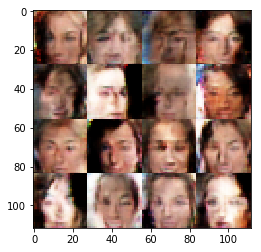

Epoch 0/1... Discriminator Loss: 1.4056... Generator Loss: 0.9282
Epoch 0/1... Discriminator Loss: 1.2768... Generator Loss: 0.7566
Epoch 0/1... Discriminator Loss: 1.2979... Generator Loss: 0.7581
Epoch 0/1... Discriminator Loss: 1.2764... Generator Loss: 0.8676
Epoch 0/1... Discriminator Loss: 1.2744... Generator Loss: 0.6896
Epoch 0/1... Discriminator Loss: 1.3340... Generator Loss: 1.3460
Epoch 0/1... Discriminator Loss: 1.3897... Generator Loss: 0.7586
Epoch 0/1... Discriminator Loss: 1.3471... Generator Loss: 1.0253
Epoch 0/1... Discriminator Loss: 1.4924... Generator Loss: 1.2576
Epoch 0/1... Discriminator Loss: 1.5187... Generator Loss: 1.2393
Epoch 0/1... Discriminator Loss: 1.0327... Generator Loss: 1.0192
Epoch 0/1... Discriminator Loss: 1.2791... Generator Loss: 1.0675
Epoch 0/1... Discriminator Loss: 1.2190... Generator Loss: 0.7852
Epoch 0/1... Discriminator Loss: 1.3096... Generator Loss: 0.9020
Epoch 0/1... Discriminator Loss: 1.2817... Generator Loss: 1.1256
Epoch 0/1.

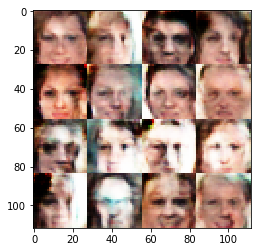

Epoch 0/1... Discriminator Loss: 1.4407... Generator Loss: 0.9087
Epoch 0/1... Discriminator Loss: 1.2056... Generator Loss: 1.2736
Epoch 0/1... Discriminator Loss: 1.5295... Generator Loss: 1.2706
Epoch 0/1... Discriminator Loss: 1.4636... Generator Loss: 0.8921
Epoch 0/1... Discriminator Loss: 1.2495... Generator Loss: 1.0588
Epoch 0/1... Discriminator Loss: 1.2213... Generator Loss: 1.3711
Epoch 0/1... Discriminator Loss: 1.2621... Generator Loss: 0.7568
Epoch 0/1... Discriminator Loss: 1.4528... Generator Loss: 1.4029
Epoch 0/1... Discriminator Loss: 1.1905... Generator Loss: 1.0764
Epoch 0/1... Discriminator Loss: 1.2796... Generator Loss: 1.1945
Epoch 0/1... Discriminator Loss: 1.8519... Generator Loss: 0.3977
Epoch 0/1... Discriminator Loss: 1.3343... Generator Loss: 1.1314
Epoch 0/1... Discriminator Loss: 1.1442... Generator Loss: 0.9759
Epoch 0/1... Discriminator Loss: 1.6515... Generator Loss: 0.6207
Epoch 0/1... Discriminator Loss: 1.3626... Generator Loss: 1.5183
Epoch 0/1.

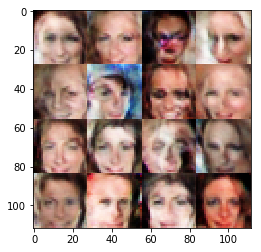

Epoch 0/1... Discriminator Loss: 1.1602... Generator Loss: 0.9663
Epoch 0/1... Discriminator Loss: 1.3505... Generator Loss: 0.8762
Epoch 0/1... Discriminator Loss: 1.2492... Generator Loss: 1.0055
Epoch 0/1... Discriminator Loss: 1.3869... Generator Loss: 1.4027
Epoch 0/1... Discriminator Loss: 1.3725... Generator Loss: 1.2012
Epoch 0/1... Discriminator Loss: 1.2378... Generator Loss: 0.9111
Epoch 0/1... Discriminator Loss: 1.6767... Generator Loss: 1.8897
Epoch 0/1... Discriminator Loss: 1.2791... Generator Loss: 0.7595
Epoch 0/1... Discriminator Loss: 1.2992... Generator Loss: 1.0690
Epoch 0/1... Discriminator Loss: 1.2126... Generator Loss: 0.9506
Epoch 0/1... Discriminator Loss: 1.1519... Generator Loss: 1.1015
Epoch 0/1... Discriminator Loss: 1.2397... Generator Loss: 1.1074
Epoch 0/1... Discriminator Loss: 1.8627... Generator Loss: 0.3043
Epoch 0/1... Discriminator Loss: 1.4313... Generator Loss: 0.7717
Epoch 0/1... Discriminator Loss: 1.2682... Generator Loss: 0.7566
Epoch 0/1.

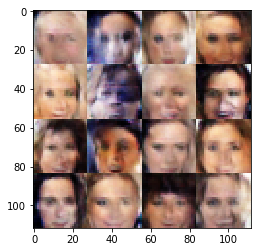

Epoch 0/1... Discriminator Loss: 1.5420... Generator Loss: 1.3978
Epoch 0/1... Discriminator Loss: 1.4309... Generator Loss: 0.8675
Epoch 0/1... Discriminator Loss: 1.4039... Generator Loss: 0.7648
Epoch 0/1... Discriminator Loss: 1.3693... Generator Loss: 1.2082
Epoch 0/1... Discriminator Loss: 1.3369... Generator Loss: 0.8146
Epoch 0/1... Discriminator Loss: 1.1479... Generator Loss: 0.9465
Epoch 0/1... Discriminator Loss: 1.4133... Generator Loss: 0.9053
Epoch 0/1... Discriminator Loss: 1.1600... Generator Loss: 0.8388
Epoch 0/1... Discriminator Loss: 1.2398... Generator Loss: 1.2750
Epoch 0/1... Discriminator Loss: 1.4400... Generator Loss: 1.4560
Epoch 0/1... Discriminator Loss: 1.1699... Generator Loss: 0.9756
Epoch 0/1... Discriminator Loss: 1.1918... Generator Loss: 1.1393
Epoch 0/1... Discriminator Loss: 1.3763... Generator Loss: 0.7906
Epoch 0/1... Discriminator Loss: 1.2504... Generator Loss: 0.8727
Epoch 0/1... Discriminator Loss: 1.3099... Generator Loss: 1.1851
Epoch 0/1.

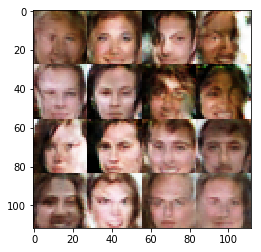

Epoch 0/1... Discriminator Loss: 1.2631... Generator Loss: 1.0957
Epoch 0/1... Discriminator Loss: 1.2789... Generator Loss: 0.8408
Epoch 0/1... Discriminator Loss: 1.4285... Generator Loss: 0.9677
Epoch 0/1... Discriminator Loss: 1.2299... Generator Loss: 0.8793
Epoch 0/1... Discriminator Loss: 1.1781... Generator Loss: 0.9824
Epoch 0/1... Discriminator Loss: 1.2918... Generator Loss: 0.8217
Epoch 0/1... Discriminator Loss: 1.2407... Generator Loss: 0.8824
Epoch 0/1... Discriminator Loss: 1.7838... Generator Loss: 0.3709
Epoch 0/1... Discriminator Loss: 1.2823... Generator Loss: 0.6357
Epoch 0/1... Discriminator Loss: 1.3859... Generator Loss: 0.7276
Epoch 0/1... Discriminator Loss: 1.2859... Generator Loss: 0.9902
Epoch 0/1... Discriminator Loss: 1.4150... Generator Loss: 0.8731
Epoch 0/1... Discriminator Loss: 1.2260... Generator Loss: 0.8960
Epoch 0/1... Discriminator Loss: 1.1507... Generator Loss: 0.8646
Epoch 0/1... Discriminator Loss: 1.3340... Generator Loss: 0.7714
Epoch 0/1.

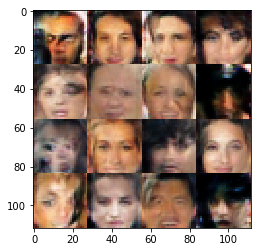

Epoch 0/1... Discriminator Loss: 1.3664... Generator Loss: 1.1187
Epoch 0/1... Discriminator Loss: 1.3767... Generator Loss: 0.6441
Epoch 0/1... Discriminator Loss: 1.3836... Generator Loss: 0.9725
Epoch 0/1... Discriminator Loss: 1.3650... Generator Loss: 0.7878
Epoch 0/1... Discriminator Loss: 1.1565... Generator Loss: 0.8716
Epoch 0/1... Discriminator Loss: 1.2508... Generator Loss: 0.6267
Epoch 0/1... Discriminator Loss: 1.3436... Generator Loss: 0.8493
Epoch 0/1... Discriminator Loss: 1.3200... Generator Loss: 0.9560
Epoch 0/1... Discriminator Loss: 1.3496... Generator Loss: 0.8863
Epoch 0/1... Discriminator Loss: 1.3958... Generator Loss: 0.8427
Epoch 0/1... Discriminator Loss: 1.3395... Generator Loss: 0.7856
Epoch 0/1... Discriminator Loss: 1.2038... Generator Loss: 1.0132
Epoch 0/1... Discriminator Loss: 1.0524... Generator Loss: 0.8844
Epoch 0/1... Discriminator Loss: 1.2479... Generator Loss: 0.9652
Epoch 0/1... Discriminator Loss: 1.3013... Generator Loss: 0.9408
Epoch 0/1.

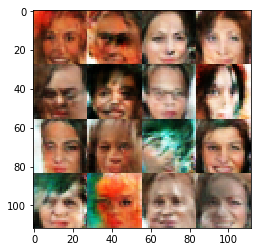

Epoch 0/1... Discriminator Loss: 1.2959... Generator Loss: 1.0369
Epoch 0/1... Discriminator Loss: 1.2202... Generator Loss: 0.7822
Epoch 0/1... Discriminator Loss: 1.2704... Generator Loss: 0.8611
Epoch 0/1... Discriminator Loss: 1.3336... Generator Loss: 1.0106
Epoch 0/1... Discriminator Loss: 1.3810... Generator Loss: 1.3296
Epoch 0/1... Discriminator Loss: 1.3016... Generator Loss: 1.2074
Epoch 0/1... Discriminator Loss: 1.4820... Generator Loss: 0.6880
Epoch 0/1... Discriminator Loss: 1.2063... Generator Loss: 0.8775
Epoch 0/1... Discriminator Loss: 1.1500... Generator Loss: 1.0204
Epoch 0/1... Discriminator Loss: 1.6881... Generator Loss: 1.6786
Epoch 0/1... Discriminator Loss: 1.5590... Generator Loss: 0.4617
Epoch 0/1... Discriminator Loss: 1.3467... Generator Loss: 1.0388
Epoch 0/1... Discriminator Loss: 1.3311... Generator Loss: 0.9230
Epoch 0/1... Discriminator Loss: 1.2849... Generator Loss: 0.9856
Epoch 0/1... Discriminator Loss: 1.4278... Generator Loss: 0.6579
Epoch 0/1.

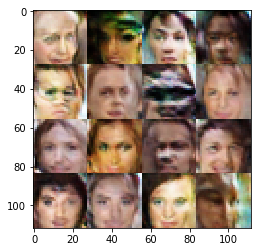

Epoch 0/1... Discriminator Loss: 1.3699... Generator Loss: 0.6584
Epoch 0/1... Discriminator Loss: 1.3790... Generator Loss: 1.2752
Epoch 0/1... Discriminator Loss: 1.2959... Generator Loss: 0.9861
Epoch 0/1... Discriminator Loss: 1.3323... Generator Loss: 0.8587
Epoch 0/1... Discriminator Loss: 1.3848... Generator Loss: 0.9097
Epoch 0/1... Discriminator Loss: 1.3708... Generator Loss: 0.7390
Epoch 0/1... Discriminator Loss: 1.4971... Generator Loss: 1.3532
Epoch 0/1... Discriminator Loss: 1.3696... Generator Loss: 0.9093
Epoch 0/1... Discriminator Loss: 1.2493... Generator Loss: 0.9696
Epoch 0/1... Discriminator Loss: 1.3516... Generator Loss: 0.8319
Epoch 0/1... Discriminator Loss: 1.2131... Generator Loss: 1.3514
Epoch 0/1... Discriminator Loss: 1.3185... Generator Loss: 0.7077
Epoch 0/1... Discriminator Loss: 1.4481... Generator Loss: 0.6384
Epoch 0/1... Discriminator Loss: 1.6429... Generator Loss: 1.6966
Epoch 0/1... Discriminator Loss: 1.2399... Generator Loss: 1.1607
Epoch 0/1.

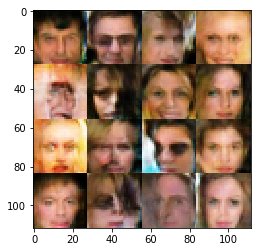

Epoch 0/1... Discriminator Loss: 1.3858... Generator Loss: 0.6337
Epoch 0/1... Discriminator Loss: 1.3596... Generator Loss: 0.6341
Epoch 0/1... Discriminator Loss: 1.3039... Generator Loss: 1.0434
Epoch 0/1... Discriminator Loss: 1.3160... Generator Loss: 1.0120
Epoch 0/1... Discriminator Loss: 1.4590... Generator Loss: 0.8752
Epoch 0/1... Discriminator Loss: 1.2890... Generator Loss: 1.0741
Epoch 0/1... Discriminator Loss: 1.3924... Generator Loss: 1.2574
Epoch 0/1... Discriminator Loss: 1.1999... Generator Loss: 1.0027
Epoch 0/1... Discriminator Loss: 1.4532... Generator Loss: 1.5085
Epoch 0/1... Discriminator Loss: 1.1326... Generator Loss: 0.8809
Epoch 0/1... Discriminator Loss: 1.2563... Generator Loss: 1.0345
Epoch 0/1... Discriminator Loss: 1.3805... Generator Loss: 1.1290
Epoch 0/1... Discriminator Loss: 1.3342... Generator Loss: 1.4296
Epoch 0/1... Discriminator Loss: 1.3198... Generator Loss: 0.7112
Epoch 0/1... Discriminator Loss: 1.3913... Generator Loss: 0.8266
Epoch 0/1.

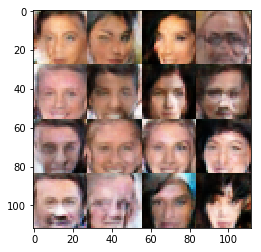

Epoch 0/1... Discriminator Loss: 1.3071... Generator Loss: 0.7110
Epoch 0/1... Discriminator Loss: 1.3157... Generator Loss: 0.8734
Epoch 0/1... Discriminator Loss: 1.4335... Generator Loss: 0.5633
Epoch 0/1... Discriminator Loss: 1.3293... Generator Loss: 0.8882
Epoch 0/1... Discriminator Loss: 1.4169... Generator Loss: 0.6778
Epoch 0/1... Discriminator Loss: 1.1074... Generator Loss: 1.0731
Epoch 0/1... Discriminator Loss: 1.3871... Generator Loss: 0.6473
Epoch 0/1... Discriminator Loss: 1.3176... Generator Loss: 1.3013
Epoch 0/1... Discriminator Loss: 1.3453... Generator Loss: 1.2498
Epoch 0/1... Discriminator Loss: 1.2940... Generator Loss: 0.9507
Epoch 0/1... Discriminator Loss: 1.1449... Generator Loss: 0.8945
Epoch 0/1... Discriminator Loss: 1.2155... Generator Loss: 0.9919
Epoch 0/1... Discriminator Loss: 1.2217... Generator Loss: 0.9484
Epoch 0/1... Discriminator Loss: 1.2725... Generator Loss: 1.0493
Epoch 0/1... Discriminator Loss: 1.2354... Generator Loss: 0.8533
Epoch 0/1.

In [14]:
batch_size = 64
z_dim = 100
learning_rate = 0.0005
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.